<a href="https://colab.research.google.com/github/felipefesg/limpeza-e-exploracao-de-dados/blob/main/PROJETO_2_%7C_Dados_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <font color='blue'> PROJETO 2: Limpeza, Engenharia de Atributos e Análise Exploratória de Dados de Vendas</font>

## 1. Definição do Problema de Negócio

### 1.1. Contexto

Uma empresa de e-commerce, em plena fase de crescimento, coleta diariamente um volume significativo de dados transacionais de suas vendas online. Esses dados, provenientes de diversas fontes, são armazenados em um sistema bruto e incluem informações sobre pedidos, clientes, produtos, categorias e status de entrega.

### 1.2. Objetivos do Projeto

O objetivo principal deste projeto é transformar os dados brutos de vendas em um ativo confiável e acionável, permitindo que a empresa baseie suas decisões estratégicas em informações precisas.

Para alcançar este objetivo, os seguintes passos serão executados:

- Limpeza e Validação: Implementar um processo para identificar e corrigir as inconsistências nos dados, tratando valores ausentes, removendo duplicatas, corrigindo tipos de dados e lidando com outliers.

- Análise Exploratória de Dados (EDA): Analisar o conjunto de dados limpo para extrair insights iniciais e responder às perguntas de negócio fundamentais.

- Geração de Insights Visuais: Criar um conjunto de visualizações que comuniquem de forma clara e objetiva os principais indicadores de desempenho de vendas.

### 1.4. Critérios de Sucesso

O projeto será considerado um sucesso quando formos capazes de entregar:

- Um conjunto de dados (dataset) limpo e validado, pronto para ser utilizado em análises futuras.

- Um relatório de análise respondendo com clareza às seguintes questões:

    - O faturamento total e a receita por categoria de produto.

    - A identificação do top 5 produtos mais vendidos em quantidade e em receita.

    - Um gráfico mostrando a tendência de vendas diárias no período analisado.

    - Uma análise da distribuição percentual dos status de entrega (Entregue, Pendente, Cancelado).


## 2. Importação das Bibliotecas

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importação dos dados
df_vendas = pd.read_csv("vendas.csv", encoding = 'utf-8')

In [ ]:
# Dimensões do DataFrame
df_vendas.shape

#LINHAS, COLUNAS

(103, 8)

In [ ]:
# Primeiras linhas
df_vendas.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109.0,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135.0,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113.0,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130.0,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147.0,Smartwatch,Acessórios,4.0,850.0,Cancelado


In [ ]:
# Últimas linhas
df_vendas.tail()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
98,1099,2026-09-26,144.0,Fone de Ouvido,Acessórios,4.0,2100.0,Entregue
99,1100,2026-10-07,105.0,Smartphone,Acessórios,1.0,850.0,Entregue
100,1001,2026-06-25,109.0,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
101,1002,2026-06-13,135.0,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
102,1003,2026-06-05,113.0,Smartwatch,Acessórios,3.0,799.5,Entregue


## Passo 2 - Análise Exploratória de Dados (EDA)
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Antes de fazer qualquer modificação vamos inspecionar o DataFrame para entender sua estrutura e identificar os problemas.

In [ ]:
# Verificando as informações gerais do DataFrame
print("\n--- Informações Gerais do DataFrame (df_vendas.info()) ---\n")
df_vendas.info()


#AS COLUNAS DE CLIENTE_ID / QUANTIDADE /PRECO_UNITARIO = PROVAVELMENTE TEM COISAS EM BRANCO
#O TIPO DAS COLUNAS TAMBEM ESTÁ ERRADO, EX. QUANTIDADE ESTA EM FLOAT, MAS DEVERIA SER INT


--- Informações Gerais do DataFrame (df_vendas.info()) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       103 non-null    int64  
 1   Data_Compra     103 non-null    object 
 2   Cliente_ID      102 non-null    float64
 3   Produto         103 non-null    object 
 4   Categoria       103 non-null    object 
 5   Quantidade      97 non-null     float64
 6   Preco_Unitario  103 non-null    object 
 7   Status_Entrega  100 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.6+ KB


In [ ]:
print("\n--- Verificando valores ausentes ---\n")
print(df_vendas.isna().sum())

#UTILIZADO PARA VER QUANTOS VALORES FALTANTES TEM


--- Verificando valores ausentes ---

ID_Pedido         0
Data_Compra       0
Cliente_ID        1
Produto           0
Categoria         0
Quantidade        6
Preco_Unitario    0
Status_Entrega    3
dtype: int64


In [ ]:
print("\n--- Verificando a presença de registros duplicados ---\n")
print(f"Número de linhas duplicadas: {df_vendas.duplicated().sum()}")


--- Verificando a presença de registros duplicados ---

Número de linhas duplicadas: 3


In [ ]:
print("\n--- Estatísticas descritivas para colunas numéricas ---\n")
# Usamos o describe() para ter uma noção inicial. Note que Preco_Unitario não aparecerá por ser 'object'.
print(df_vendas.describe())

#DESCRIBE SÓ FUNCIONA EM COLUNAS NÚMERICAS
#STD = DESVIO PADRÃO, QUE É O QUANTO O QUE OS DADOS ESTÃO ESPALHADOS A PARTIR DA MÉDIA


--- Estatísticas descritivas para colunas numéricas ---

         ID_Pedido  Cliente_ID  Quantidade
count   103.000000  102.000000   97.000000
mean   1049.087379  124.313725    3.103093
std      29.733821   14.072641    4.954973
min    1001.000000  100.000000    1.000000
25%    1023.500000  113.000000    2.000000
50%    1049.000000  125.000000    3.000000
75%    1074.500000  136.000000    4.000000
max    1100.000000  148.000000   50.000000


In [ ]:
print("\n--- Estatísticas descritivas para colunas categóricas ---\n")
print(df_vendas.describe(include = [object]))

#AGORA O DESCRIBE ESTA PRINTANDO SOMENTE AS COLUNAS QUE ESTÃO EM TEXTO / OBJECT


--- Estatísticas descritivas para colunas categóricas ---

       Data_Compra     Produto   Categoria Preco_Unitario Status_Entrega
count          103         103         103            103            100
unique          67           5           2              6              3
top     2026-06-25  Smartwatch  Acessórios         8500.0       Entregue
freq             3          29          61             21             83


In [ ]:
# Verificando com mais detalhes a coluna preco_unitario

preco = df_vendas['Preco_Unitario'].value_counts()
preco

,count
Preco_Unitario,
8500.0,21
799.5,21
5999.9,20
2100.0,20
850.0,20
valor_invalido,1


## Passo 3 - Limpeza e Pré-Processamento dos Dados
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Agora, vamos resolver os problemas identificados na etapa anterior.

In [ ]:
# Copiando o DataFrame para manter o original intacto
df_limpo = df_vendas.copy()

In [ ]:
# Corrigindo Tipos de Dados ---

# Convertendo 'Preco_Unitario' para numérico, tratando erros
# errors='coerce' transformará valores inválidos (como 'valor_invalido') em NaN

df_limpo['Preco_Unitario'] = pd.to_numeric(df_limpo['Preco_Unitario'], errors = 'coerce')

In [ ]:
# Convertendo 'Cliente_ID' para numérico, tratando erros
df_limpo['Cliente_ID'] = pd.to_numeric(df_limpo['Cliente_ID'], errors = 'coerce').astype('Int64') # Usamos Int64 para permitir NaN

In [ ]:
# convertendo a data da compra
df_limpo['Data_Compra'] = pd.to_datetime(df_limpo['Data_Compra'])

In [ ]:
df_limpo.dtypes

,0
ID_Pedido,int64
Data_Compra,datetime64[ns]
Cliente_ID,Int64
Produto,object
Categoria,object
Quantidade,float64
Preco_Unitario,float64
Status_Entrega,object


In [ ]:
# --- Tratando Valores Ausentes (NaN) ---

# Para 'Quantidade', vamos preencher com a mediana, que é mais robusta a outliers

mediana_qtd = df_limpo['Quantidade'].median()
df_limpo.fillna({'Quantidade': mediana_qtd}, inplace = True)

In [ ]:
# Para 'Status_Entrega', podemos preencher com o valor mais frequente (moda)

moda_status = df_limpo['Status_Entrega'].mode()[0]
df_limpo['Status_Entrega'] = df_limpo['Status_Entrega'].fillna(moda_status)

In [ ]:
print("\n--- Verificando valores ausentes ---\n")
print(df_limpo.isna().sum())


--- Verificando valores ausentes ---

ID_Pedido         0
Data_Compra       0
Cliente_ID        1
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    1
Status_Entrega    0
dtype: int64


In [ ]:
# Para a coluna 'Preco_unitario' podemos estimar o valor ausente com base nos vizinhos (bom para dados numéricos)
df_limpo['Preco_Unitario'] = df_limpo['Preco_Unitario'].interpolate(method='linear')

In [ ]:
print("\n--- Verificando valores ausentes ---\n")
print(df_limpo.isna().sum())


--- Verificando valores ausentes ---

ID_Pedido         0
Data_Compra       0
Cliente_ID        1
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Status_Entrega    0
dtype: int64


In [ ]:
# DICA: OUTROS MÉTODO DE PREENCHIMENTO

# Preenche NaN com o último valor válido observado
#df_limpo['Quantidade'] = df_limpo['Quantidade'].fillna(method='ffill')

In [ ]:
# Para 'Cliente_ID', onde o NaN foi gerado por erro ou falta de informação,
# a melhor abordagem é remover as linhas, pois não podemos inferir esses dados.

df_limpo.dropna(subset = ['Cliente_ID'], inplace = True)

In [ ]:
# --- Removendo Duplicatas ---

df_limpo.drop_duplicates(inplace = True)

In [ ]:
print(f"Número de linhas duplicadas: {df_limpo.duplicated().sum()}")

Número de linhas duplicadas: 0


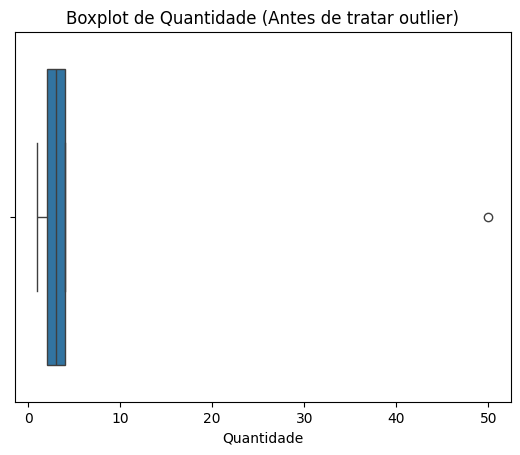

In [ ]:
# --- Tratando Outliers ---
# Vamos visualizar o outlier na coluna 'Quantidade'

sns.boxplot(x = df_limpo['Quantidade'])
plt.title('Boxplot de Quantidade (Antes de tratar outlier)')
plt.show()

In [ ]:
# Vamos remover valores de 'Quantidade' que estão muito distantes da média.
# Uma abordagem comum é remover valores que estão além de 3 desvios padrão da média.

limite_superior = df_limpo['Quantidade'].mean() + 3 * df_limpo['Quantidade'].std()
df_limpo = df_limpo[df_limpo['Quantidade'] < limite_superior]

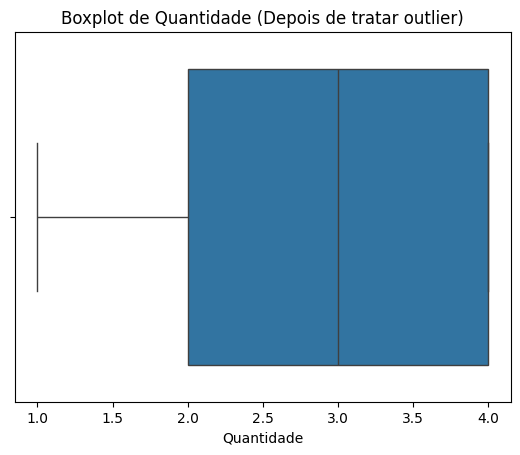

In [ ]:
# Verificando o resultado
sns.boxplot(x = df_limpo['Quantidade'])
plt.title('Boxplot de Quantidade (Depois de tratar outlier)')
plt.show()

In [ ]:
# --- Verificação Final Pós-Limpeza ---
print("\n--- Verificação Final ---\n")
df_limpo.info()
print("\nValores ausentes restantes:\n", df_limpo.isna().sum())
print(f"\nLinhas duplicadas restantes: {df_limpo.duplicated().sum()}")


--- Verificação Final ---

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       98 non-null     int64         
 1   Data_Compra     98 non-null     datetime64[ns]
 2   Cliente_ID      98 non-null     Int64         
 3   Produto         98 non-null     object        
 4   Categoria       98 non-null     object        
 5   Quantidade      98 non-null     float64       
 6   Preco_Unitario  98 non-null     float64       
 7   Status_Entrega  98 non-null     object        
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 7.0+ KB

Valores ausentes restantes:
 ID_Pedido         0
Data_Compra       0
Cliente_ID        0
Produto           0
Categoria         0
Quantidade        0
Preco_Unitario    0
Status_Entrega    0
dtype: int64

Linhas duplicadas restantes: 0


## Passo 4 - Engenharia de Atributos (Feature Engineering) e Extração de Insights

Com os dados limpos, podemos começar a fazer perguntas e extrair insights.

In [ ]:
df_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado


**Qual é o faturamento total e a receita por categoria de produto?**

In [ ]:
# --- Criando uma nova coluna 'Total_Venda' ---

df_limpo['Total_Venda'] = df_limpo['Quantidade'] * df_limpo['Preco_Unitario']

In [ ]:
df_limpo.head()

,ID_Pedido,Data_Compra,Cliente_ID,Produto,Categoria,Quantidade,Preco_Unitario,Status_Entrega,Total_Venda
0,1001,2026-06-25,109,Smartwatch,Eletrônicos,1.0,5999.9,Cancelado,5999.9
1,1002,2026-06-13,135,Smartwatch,Eletrônicos,3.0,8500.0,Entregue,25500.0
2,1003,2026-06-05,113,Smartwatch,Acessórios,3.0,799.5,Entregue,2398.5
3,1004,2026-06-20,130,Smartwatch,Acessórios,4.0,2100.0,Entregue,8400.0
4,1005,2026-06-25,147,Smartwatch,Acessórios,4.0,850.0,Cancelado,3400.0


In [ ]:
# 1. Qual o total de receita?
receita_total = df_limpo['Total_Venda'].sum()
print(f"A receita total da loja foi de: R$ {receita_total:,.2f}")

A receita total da loja foi de: R$ 947,569.00


In [ ]:
# 2. Qual a receita total por categoria de produto?
receita_por_categoria = df_limpo.groupby('Categoria')['Total_Venda'].sum().sort_values(ascending = False)
print("\n--- Receita Total por Categoria ---\n")
print(receita_por_categoria)


--- Receita Total por Categoria ---

Categoria
Eletrônicos    752195.0
Acessórios     195374.0
Name: Total_Venda, dtype: float64


A identificação do top 5 produtos mais vendidos em quantidade e em receita.

In [ ]:
# 3. Qual o produto mais vendido em quantidade?
produto_mais_vendido = df_limpo.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)
print("\n--- Total de Unidades Vendidas por Produto ---\n")
print(produto_mais_vendido)


--- Total de Unidades Vendidas por Produto ---

Produto
Smartphone          84.0
Fone de Ouvido      61.0
Smartwatch          59.0
Notebook            32.0
Teclado Mecânico    24.0
Name: Quantidade, dtype: float64


In [ ]:
# 4. Análise de vendas ao longo do tempo
# Agrupando as vendas por dia
vendas_por_dia = df_limpo.set_index('Data_Compra').resample('D')['Total_Venda'].sum()
print("\n--- Resumo de Vendas por Dia (Primeiros 5 dias) ---\n")
print(vendas_por_dia.head())


--- Resumo de Vendas por Dia (Primeiros 5 dias) ---

Data_Compra
2026-06-05     2398.5
2026-06-06        0.0
2026-06-07        0.0
2026-06-08        0.0
2026-06-09    25500.0
Freq: D, Name: Total_Venda, dtype: float64


## Passo 5 - Visualização dos Dados e Análise

Gráficos são essenciais para comunicar os resultados da análise.

In [ ]:
# Configurando o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

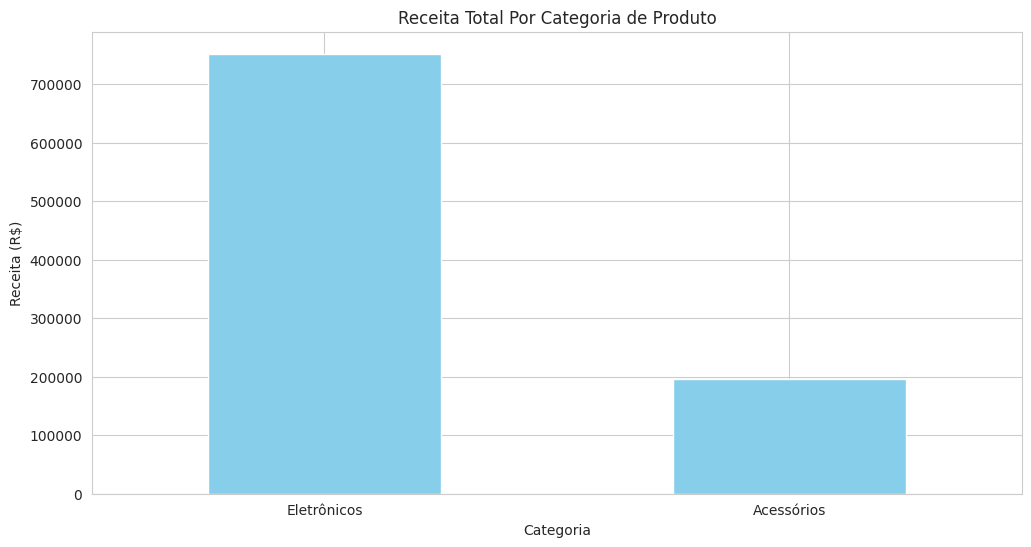

In [ ]:
# Gráfico 1: Receita por Categoria
receita_por_categoria.plot(kind = 'bar', color = 'skyblue')
plt.title('Receita Total Por Categoria de Produto')
plt.ylabel('Receita (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation = 0)
plt.show()

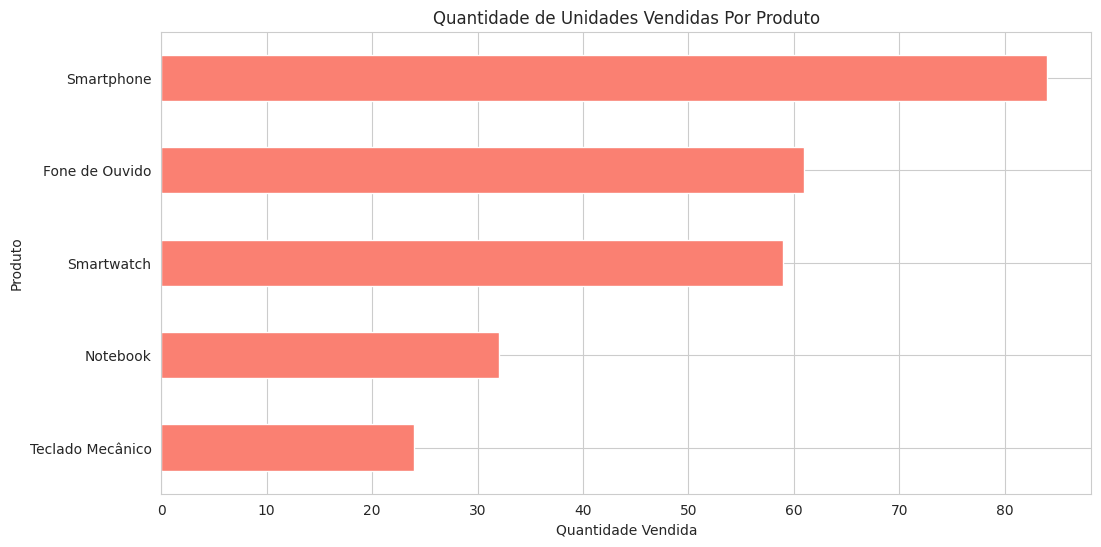

In [ ]:
# Gráfico 2: Quantidade Vendida por Produto
produto_mais_vendido.plot(kind = 'barh', color = 'salmon')
plt.title('Quantidade de Unidades Vendidas Por Produto')
plt.ylabel('Produto')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis() # Inverte o eixo para o maior valor ficar no topo
plt.show()

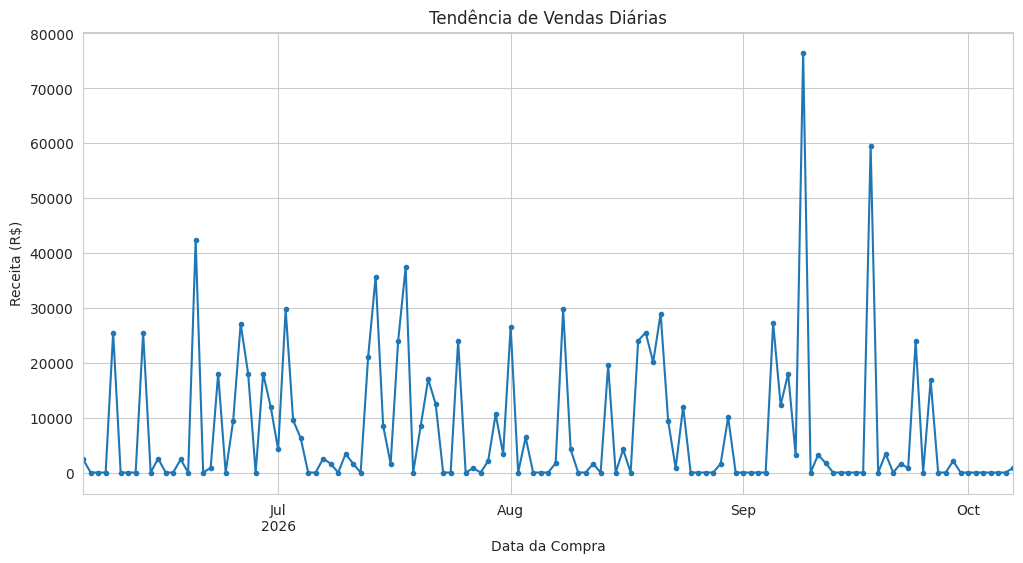

In [ ]:
# Gráfico 3: Tendência de Vendas ao Longo do Tempo
vendas_por_dia.plot(kind = 'line', marker = '.', linestyle = '-')
plt.title('Tendência de Vendas Diárias')
plt.ylabel('Receita (R$)')
plt.xlabel('Data da Compra')
plt.grid(True)
plt.show()

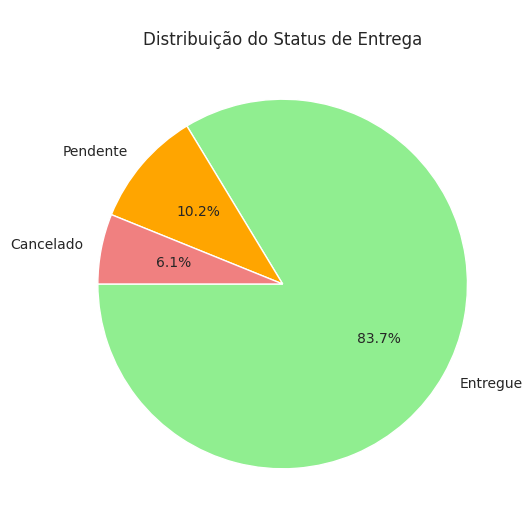

In [ ]:
# Gráfico 4: Distribuição do Status de Entrega

# Conta quantas vezes aparece cada status de entrega
status_counts = df_limpo['Status_Entrega'].value_counts()

plt.pie(
    status_counts,                 # Valores numéricos para cada fatia (quantidade de cada status)
    labels = status_counts.index,  # Rótulos de cada fatia (labels dos status)
    autopct = '%1.1f%%',           # Mostra o percentual em cada fatia com 1 casa decimal
    startangle = 180,              # Ângulo inicial para "girar" o gráfico e escolher onde começa a primeira fatia
    colors = ['lightgreen',        # Cor da primeira fatia
              'orange',            # Cor da segunda fatia
              'lightcoral']        # Cor da terceira fatia
)

plt.title('\nDistribuição do Status de Entrega')  # Título do gráfico
plt.show()                                         # Exibe o gráfico na tela